In [1]:
import numpy as np
import matplotlib.pyplot as plt
from manager import DataManager
from comparator import Indicator, Comparator

%load_ext autoreload
%autoreload 2

y_win = (6000, 7000)
x_win = (9000, 10000)

In [2]:
manager = DataManager(
    origin_csv_fname='/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/input/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop.csv',
    annotation_fname='/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/01. Co-expression network/1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned/Cluster_annotation.csv'
)

In [3]:
indicatorTester = Indicator(
    origin_csv = manager.origin_csv,
    annotation = manager.annotation
    )
indicatorTester.indicators.head()

Finding positive indicators:   0%|          | 0/3 [00:00<?, ?step/s]

Finding negative indicators: 100%|██████████| 4/4 [00:01<00:00,  3.38cluster/s]


,geneID,count,cluster,type
0,MT-RNR2,182774,0,pos
1,MT-CO2,42167,0,pos
2,MT-TV,39477,0,pos
3,MT-CO3,39279,0,pos
4,MT-ND1,34312,0,pos


In [4]:
comparatorTester = Comparator(
    indicator = indicatorTester,
    metadata = manager.metadata,
    markers = manager.markers,
    contours = manager.contours
)

In [7]:
#neg_indic_mask = comparatorTester.create_indicator_mask(xrange = x_win, 
#                                                        yrange = y_win,
#                                                        indicators = indicatorTester.create_indicator_dict(indicatorTester.negative_indicators))
pos_indic_mask = comparatorTester.create_indicator_mask(xrange = x_win, 
                                                        yrange = y_win,
                                                        indicators = indicatorTester.create_indicator_dict(indicatorTester.positive_indicators))
print(np.unique(pos_indic_mask))

[0 1]


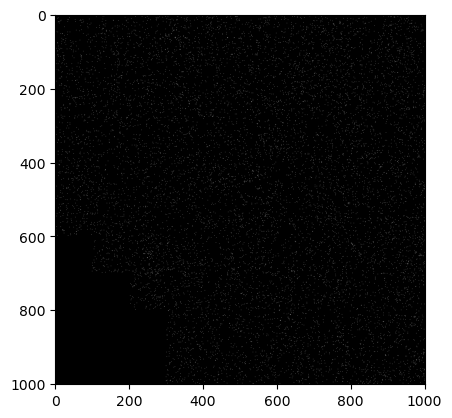

In [8]:
plt.imshow(pos_indic_mask, cmap='gray')